Importing libraries and overview of data

In [415]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [416]:
df_trains = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df_trains

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [417]:
# checking data measures and info
print(df_trains.describe().T)
print(df_trains.info() ) 

                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452  

In [418]:
#Removing id Column since there is no relevant information there
df_trains.drop('Id', axis=1, inplace=True)
df_trains

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [419]:
# since no all information had been displayed, a piece of code to show null values was created
for i in df_trains.columns:
    if df_trains[i].isnull().sum() > 0:
        print(i, ' - ', df_trains[i].isnull().sum())


LotFrontage  -  259
Alley  -  1369
MasVnrType  -  8
MasVnrArea  -  8
BsmtQual  -  37
BsmtCond  -  37
BsmtExposure  -  38
BsmtFinType1  -  37
BsmtFinType2  -  38
Electrical  -  1
FireplaceQu  -  690
GarageType  -  81
GarageYrBlt  -  81
GarageFinish  -  81
GarageQual  -  81
GarageCond  -  81
PoolQC  -  1453
Fence  -  1179
MiscFeature  -  1406


Creating dictionaries and setting numeric values

In [420]:
#LotShape
dict_lotShape = {3:'Reg', 2:'IR1', 1:'IR2', 0:'IR3'}
df_trains.LotShape = df_trains.LotShape.str.replace('Reg','3').str.replace('IR1','2').str.replace('IR2','1').str.replace('IR3','0')
df_trains.LotShape.astype('int')
#ExterQual
dict_ExterQual = {4:'Ex', 3:'Gd', 2:'TA', 1:'Fa', 0:'Po'}
df_trains.ExterQual = df_trains.ExterQual.str.replace('Ex','4').str.replace('Gd','3').str.replace('TA','2').str.replace('Fa','1').str.replace('Po','0')
df_trains.ExterQual.astype('int')
#ExterCond
dict_ExterCond = {4:'Ex', 3:'Gd', 2:'TA', 1:'Fa', 0:'Po'}
df_trains.ExterCond = df_trains.ExterCond.str.replace('Ex','4').str.replace('Gd','3').str.replace('TA','2').str.replace('Fa','1').str.replace('Po','0')
df_trains.ExterCond.astype('int')
#BsmtQual
dict_BsmtQual = {5:'Ex', 4:'Gd', 3:'TA', 2:'Fa', 1:'Po', 0:'NA'}
df_trains.BsmtQual = df_trains.BsmtQual.str.replace('Ex','5').str.replace('Gd','4').str.replace('TA','3').str.replace('Fa','2').str.replace('Po','1').str.replace('NA','0')
df_trains.BsmtQual = df_trains.BsmtQual.fillna('0')
df_trains.BsmtQual.astype('int')
#BsmtCond
dict_BsmtCond = {5:'Ex', 4:'Gd', 3:'TA', 2:'Fa', 1:'Po', 0:'NA'}
df_trains.BsmtCond = df_trains.BsmtCond.str.replace('Ex','5').str.replace('Gd','4').str.replace('TA','3').str.replace('Fa','2').str.replace('Po','1').str.replace('NA','0')
df_trains.BsmtCond = df_trains.BsmtCond.fillna('0')
df_trains.BsmtCond.astype('int')
#BsmtExposure
dict_BsmtExposure = {4:'Gd', 3:'Av', 2:'Mn', 1:'No', 0:'NA'}
df_trains.BsmtExposure = df_trains.BsmtExposure.str.replace('Gd','4').str.replace('Av','3').str.replace('Mn','2').str.replace('No','1').str.replace('NA','0')
df_trains.BsmtExposure = df_trains.BsmtExposure.fillna('0')
df_trains.BsmtExposure.astype('int')
#HeatingQC
dict_HeatingQC = {4:'Ex', 3:'Gd', 2:'TA', 1:'Fa', 0:'Po'}
df_trains.HeatingQC = df_trains.HeatingQC.str.replace('Ex','4').str.replace('Gd','3').str.replace('TA','2').str.replace('Fa','1').str.replace('Po','0')
df_trains.HeatingQC.astype('int')
#CentralAir
dict_CentralAir = {1:'Y', 0:'N'}
df_trains.CentralAir = df_trains.CentralAir.str.replace('Y','1').str.replace('N','0')
df_trains.CentralAir.astype('int')
#KitchenQual
dict_KitchenQual = {4:'Ex', 3:'Gd', 2:'TA', 1:'Fa', 0:'Po'}
df_trains.KitchenQual = df_trains.KitchenQual.str.replace('Ex','4').str.replace('Gd','3').str.replace('TA','2').str.replace('Fa','1').str.replace('Po','0')
df_trains.KitchenQual.astype('int')
#FireplaceQu
dict_FireplaceQu = {5:'Ex', 4:'Gd', 3:'TA', 2:'Fa', 1:'Po', 0:'NA'}
df_trains.FireplaceQu = df_trains.FireplaceQu.str.replace('Ex','5').str.replace('Gd','4').str.replace('TA','3').str.replace('Fa','2').str.replace('Po','1').str.replace('NA','0')
df_trains.FireplaceQu = df_trains.FireplaceQu.fillna('0')
df_trains.FireplaceQu.astype('int')
#GarageFinish
dict_GarageFinish = {3:'Fin', 2:'RFn', 1:'Unf', 0:'NA'}
df_trains.GarageFinish = df_trains.GarageFinish.str.replace('Fin','3').str.replace('RFn','2').str.replace('Unf','1').str.replace('NA','0')
df_trains.GarageFinish = df_trains.GarageFinish.fillna('0')
df_trains.GarageFinish.astype('int')
#GarageQual
dict_GarageQual = {5:'Ex', 4:'Gd', 3:'TA', 2:'Fa', 1:'Po', 0:'NA'}
df_trains.GarageQual = df_trains.GarageQual.str.replace('Ex','5').str.replace('Gd','4').str.replace('TA','3').str.replace('Fa','2').str.replace('Po','1').str.replace('NA','0')
df_trains.GarageQual = df_trains.GarageQual.fillna('0')
df_trains.GarageQual.astype('int')
#GarageCond
dict_GarageCond = {5:'Ex', 4:'Gd', 3:'TA', 2:'Fa', 1:'Po', 0:'NA'}
df_trains.GarageCond = df_trains.GarageCond.str.replace('Ex','5').str.replace('Gd','4').str.replace('TA','3').str.replace('Fa','2').str.replace('Po','1').str.replace('NA','0')
df_trains.GarageCond = df_trains.GarageCond.fillna('0')
df_trains.GarageCond.astype('int')
#PoolQC
dict_PoolQC = {4:'Ex', 3:'Gd', 2:'TA', 1:'Fa', 0:'NA'}
df_trains.PoolQC = df_trains.PoolQC.str.replace('Ex','4').str.replace('Gd','3').str.replace('TA','2').str.replace('Fa','1').str.replace('NA','0')
df_trains.PoolQC = df_trains.PoolQC.fillna('0')
df_trains.PoolQC.astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolQC, Length: 1460, dtype: int32

In [421]:
for i in df_trains.columns:
    if df_trains[i].isnull().sum() > 0:
        print(i, ' - ', df_trains[i].isnull().sum())



LotFrontage  -  259
Alley  -  1369
MasVnrType  -  8
MasVnrArea  -  8
BsmtFinType1  -  37
BsmtFinType2  -  38
Electrical  -  1
GarageType  -  81
GarageYrBlt  -  81
Fence  -  1179
MiscFeature  -  1406


#### Checking this information we can do following assumptions:
Alley:\
       It is not relevant since there are more recors with no alley access to the ones that have, so this information could be converted into outliers \
              Grvl	Gravel \
              Pave	Paved \
              NA 	No alley access

Records with MasVnrType, MasVnrArea has 8 nulls in there, so those records can be deleted

Electrical: \
       it is not relevant, there is just 1 record null, so this record can be deleted

GarageType: \
       NA values could be set as NA instead of nan

GarageYrBlt: \
       since there are 81 null values, year build values will be considered to fill the missing ones.

Fence: \
cannot assign numeric value in there since values are not as logical as thought, so this column should be deleted
       
MiscFeature: \
since there are several records with null value, has been decided to remove this column because it can generate outliers. 

In [422]:
#removing columns
df_trains.drop(['Alley','MiscFeature','Fence','LotFrontage'], axis=1, inplace=True)

#Removing rows

#Electrical
df_trains.drop(df_trains[df_trains['Electrical'].isnull()].index, inplace=True)
# There is a relation between MasVnrType and MasVnrArea, so if one of them is removed the other one too
df_trains.drop(df_trains[df_trains['MasVnrType'].isnull()].index, inplace=True)
#there is a raltion between BsmtinType1 and BsmtinType2 however, there was just one more value set as null in BsmtFinType2 so this column has been considered to be removed.
df_trains.drop(df_trains[df_trains['BsmtFinType2'].isnull()].index, inplace=True)
#adding values in GarageYrBlt and GarageType
df_trains['GarageType'] = df_trains['GarageType'].fillna('NA')
#df_trains.reset_index(inplace=True)
df_trains[df_trains['GarageYrBlt'].isnull()]['GarageYrBlt'].index
for i in df_trains[df_trains['GarageYrBlt'].isnull()]['GarageYrBlt'].index:
    df_trains['GarageYrBlt'][i]= df_trains['YearBuilt'] [i]


C:\Users\David\AppData\Local\Temp/ipykernel_7488/2391990203.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trains['GarageYrBlt'][i]= df_trains['YearBuilt'] [i]


In [423]:
for i in df_trains.columns:
    if df_trains[i].isnull().sum() > 0:
        print(i, ' - ', df_trains[i].isnull().sum())

There are some column names that starts with number, so a character will be added at the beginning in order to complete every analysis needed

In [424]:
for i in df_trains.columns:
    if i[0].isdigit():
        df_trains.rename(columns={i:'_'+i},inplace=True)
        

Have checked if there are no more columns with nulls in there, there were not.


Now, will check which distribution would fit it

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

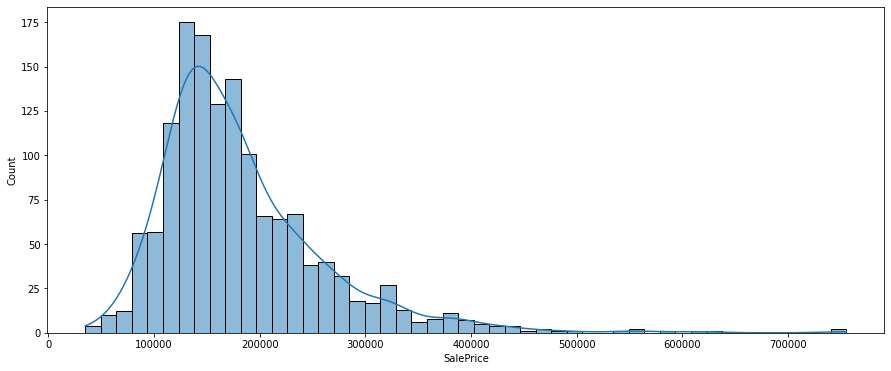

In [425]:
plt.figure(figsize=(15,6))
sns.histplot(df_trains['SalePrice'], kde=True)

Aa we can see, it seems to be a poisson distribution.\
So next step would be check p-values in order to know if attributes are relevant against SalePrice

In [426]:
df_trains.columns
    

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '_1stFlrSF', '_2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

In [427]:
sig_col_prob = {}
df_categ = []
string = 'SalePrice ~'
for i in df_trains.columns:
    string_model = ''
    if df_trains[i].dtypes == 'object':
        model = ols(f'SalePrice ~ C({i})', data = df_trains).fit()
        df_categ.append(i)
        string_model = f' C({i}) +'
    else:
        model = ols(f'SalePrice ~ {i}', data = df_trains).fit()
        string_model = ' '+ i + ' +'
    if model.f_pvalue < 0.05 and i != 'SalePrice':
        sig_col_prob[i] = model.f_pvalue
        string = string + string_model


As we can see in sig_col_prob variable, most of the data are significat relevants for SalePrice
Sales price column should be deleted from them since p value is 0 and is the value to compare with other columns

In [428]:
sig_col_prob

{'MSSubClass': 0.0019668997898389627,
 'MSZoning': 1.5774716114609725e-35,
 'LotArea': 4.188494058573459e-24,
 'LotShape': 1.2291837166364689e-23,
 'LandContour': 1.7873973312019462e-08,
 'LotConfig': 2.3104813531408423e-06,
 'Neighborhood': 7.944897112489736e-215,
 'Condition1': 1.6009219573634665e-07,
 'Condition2': 0.03953280209407048,
 'BldgType': 4.308280969293859e-08,
 'HouseStyle': 1.0205088692647994e-24,
 'OverallQual': 7.0904967242108365e-298,
 'OverallCond': 0.0004263317175746006,
 'YearBuilt': 4.090600212307172e-98,
 'YearRemodAdd': 2.4778743399914053e-90,
 'RoofStyle': 1.1401534170341191e-18,
 'RoofMatl': 8.1385685613492e-08,
 'Exterior1st': 2.089890352267967e-42,
 'Exterior2nd': 7.891304017791327e-41,
 'MasVnrType': 2.9479832665389148e-61,
 'MasVnrArea': 3.019275242084859e-80,
 'ExterQual': 2.7034189043674756e-192,
 'ExterCond': 4.180159538400305e-06,
 'Foundation': 4.157463082303885e-85,
 'BsmtQual': 3.2687659316175138e-183,
 'BsmtCond': 1.692626862971258e-08,
 'BsmtExpos

Will take all those variables in our matrix
so next step will be OLS method

In [429]:
model = ols(string[:-2], data = df_trains).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     69.26
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:07:50   Log-Likelihood:                -16073.
No. Observations:                1413   AIC:                         3.260e+04
Df Residuals:                    1187   BIC:                         3.378e+04
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

There are at least 65 columns that seem to be relevant\

Creating correlation matrix with orinary values

In [430]:
df_trains_corr = df_trains.corr()[df_trains.corr()['SalePrice'].abs() > 0.50]['SalePrice']#en la correlacion se necesita que sea mayor a 50
df_trains_corr

OverallQual     0.786705
YearBuilt       0.518637
YearRemodAdd    0.500217
TotalBsmtSF     0.611020
_1stFlrSF       0.614622
GrLivArea       0.711060
FullBath        0.575542
TotRmsAbvGrd    0.545546
GarageYrBlt     0.502116
GarageCars      0.641828
GarageArea      0.621091
SalePrice       1.000000
Name: SalePrice, dtype: float64

# PCA Analysis

Matching variables with good correlation of SalePrice againts the ones that seem to be relevant

In [431]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Se crea una instancia de la StandardScaler
df_dummies = pd.get_dummies(data=df_trains[df_categ]) # generamos dummies de las variables categoricas

Getting ordinary columns with good correlation and add them to the dummies one\
Checking which variables have good correlation

In [432]:
#agregamos las variables ordinarias que tienen una correlación mayor al 50%
df_trains_corr_cols = pd.DataFrame(df_trains_corr)
df_trains_corr_cols.reset_index(inplace=True)
df_trains[df_trains_corr_cols['index']]
df_dummies = pd.concat([df_dummies,df_trains[df_trains_corr_cols['index']]], axis=1, join='inner') # concatenamos las variables ordinarias con los dummies de las variables categoricas con buena correlación
df_dummies_corr = df_dummies.corr()[df_dummies.corr()['SalePrice'].abs() > 0.50 ][['SalePrice']] # vemos que hay una alta correlación entre las variables de precio con algunos dummies
df_dummies_corr

,SalePrice
ExterQual_2,-0.587583
BsmtQual_5,0.551399
KitchenQual_2,-0.520576
KitchenQual_4,0.501267
OverallQual,0.786705
YearBuilt,0.518637
YearRemodAdd,0.500217
TotalBsmtSF,0.611020
_1stFlrSF,0.614622
GrLivArea,0.711060


Taking off SalePrice column and leave all columns that have been gotten above

In [433]:
#tomamos solo las columnas que esta correlacionadas con el precio y excluimos el precio de nuestra matriz
df_dummies_corr.reset_index(inplace=True)
df_dummies = df_dummies[df_dummies_corr['index']]
df_dummies.drop(columns='SalePrice', inplace=True)
df_dummies

,ExterQual_2,BsmtQual_5,KitchenQual_2,KitchenQual_4,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,_1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
0,0,0,0,0,7,2003,2003,856,856,1710,2,8,2003.0,2,548
1,1,0,1,0,6,1976,1976,1262,1262,1262,2,6,1976.0,2,460
2,0,0,0,0,7,2001,2002,920,920,1786,2,6,2001.0,2,608
3,1,0,0,0,7,1915,1970,756,961,1717,1,7,1998.0,3,642
4,0,0,0,0,8,2000,2000,1145,1145,2198,2,9,2000.0,3,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,1,0,6,1999,2000,953,953,1647,2,7,1999.0,2,460
1456,1,0,1,0,6,1978,1988,1542,2073,2073,2,7,1978.0,2,500
1457,0,0,0,0,7,1941,2006,1152,1188,2340,2,9,1941.0,1,252
1458,1,0,0,0,5,1950,1996,1078,1078,1078,1,5,1950.0,1,240


Starting Fit_transform method

In [434]:

#Generamos los dummies de las variables categoricas
stand_data = scaler.fit_transform(df_dummies)
#los centramos en 0 
df_stand_data = pd.DataFrame(stand_data, index = df_dummies.index, columns = df_dummies.columns)
df_stand_data


,ExterQual_2,BsmtQual_5,KitchenQual_2,KitchenQual_4,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,_1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
0,-1.267679,-0.304643,-0.997879,-0.274486,0.634231,1.039155,0.870141,-0.559825,-0.796475,0.360898,0.798472,0.915403,0.997693,0.304124,0.341502
1,0.788843,-0.304643,1.002125,-0.274486,-0.102750,0.149859,-0.449967,0.443885,0.257906,-0.489976,0.798472,-0.321770,-0.027407,0.304124,-0.071128
2,-1.267679,-0.304643,-0.997879,-0.274486,0.634231,0.973281,0.821248,-0.401604,-0.630267,0.505243,0.798472,-0.321770,0.921759,0.304124,0.622840
3,0.788843,-0.304643,-0.997879,-0.274486,0.634231,-1.859290,-0.743324,-0.807044,-0.523790,0.374193,-1.018341,0.296817,0.807859,1.647023,0.782265
4,-1.267679,-0.304643,-0.997879,-0.274486,1.371212,0.940344,0.723462,0.154639,-0.045943,1.287743,0.798472,1.533990,0.883793,1.647023,1.691926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.788843,-0.304643,1.002125,-0.274486,-0.102750,0.907407,0.723462,-0.320022,-0.544566,0.241244,0.798472,0.296817,0.845826,0.304124,-0.071128
1456,0.788843,-0.304643,1.002125,-0.274486,-0.102750,0.215733,0.136748,1.136099,2.364069,1.050334,0.798472,0.296817,0.048526,0.304124,0.116431
1457,-1.267679,-0.304643,-0.997879,-0.274486,0.634231,-1.002931,1.016819,0.171944,0.065728,1.557440,0.798472,1.533990,-1.356240,-1.038774,-1.046434
1458,0.788843,-0.304643,-0.997879,-0.274486,-0.839731,-0.706499,0.527891,-0.010998,-0.219941,-0.839442,-1.018341,-0.940357,-1.014540,-1.038774,-1.102702


#### PCA process
Getting ratio where cumsum is at least 80%

In [435]:
pca = PCA() # creamos una instancia de #PCA
pca.fit(df_stand_data) #prepara los datos y genera la matriz pca
ratio_80 = 0 # variable para guardar cuantos valores se necesitan para llegar al 80%
for i, num in enumerate(pca.explained_variance_ratio_.cumsum()):
    if num > 0.8:
        ratio_80 = i
        break
ratio_80

4

fit and transform process for columns

In [436]:
pca_ratio_80 = PCA(n_components=ratio_80) # creas una instancia de PCA con el numero de componentes definido en ratio_80
pca_transform_ratio_80 = pca_ratio_80.fit_transform(df_stand_data) #normalizas y estandarizas los datos para el numero de componentes definido y se centran en 0
df_pca_transform = pd.DataFrame(pca_transform_ratio_80, index=df_stand_data.index,columns = ['comp'+str(x+1) for x in range(ratio_80)]) #creas el dataframe
df_pca_transform

,comp1,comp2,comp3,comp4
0,1.791821,-1.410191,-1.687428,0.385872
1,-0.426395,0.282228,0.235221,-1.106798
2,1.690532,-1.712462,-1.098508,0.155258
3,-0.085184,0.276780,-0.467497,-0.804128
4,3.450850,-0.302722,-1.637284,-0.804499
...,...,...,...,...
1455,0.224075,-0.588041,-0.804471,-0.780430
1456,1.038271,1.797159,0.250557,-1.478160
1457,0.686651,1.446927,-2.222381,2.059979
1458,-2.046225,-0.430441,0.468704,1.065916


Creating component matrix

In [437]:
df_matrix_componentes = pd.DataFrame(pca_ratio_80.components_,
                                     columns = df_stand_data.columns,
                                     index = df_pca_transform.columns) # se crea la matriz de componentes
df_matrix_componentes

,ExterQual_2,BsmtQual_5,KitchenQual_2,KitchenQual_4,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,_1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
comp1,-0.279057,0.208703,-0.247717,0.180846,0.319348,0.266440,0.248097,0.256911,0.249127,0.259179,0.265496,0.202702,0.273435,0.294260,0.286011
comp2,0.214856,0.098782,0.195798,0.161085,-0.003311,-0.374439,-0.302714,0.245832,0.336302,0.393705,0.059613,0.421164,-0.368912,-0.048746,-0.001127
comp3,0.085736,0.400647,0.136580,0.387254,-0.036808,0.060848,-0.114176,0.354639,0.268414,-0.325169,-0.402604,-0.409479,0.029273,0.022070,0.103731
comp4,-0.221739,0.304470,-0.335963,0.465468,0.143107,-0.115802,0.217171,-0.167599,-0.176888,0.037730,-0.004345,0.057220,-0.198921,-0.396832,-0.431747


In [438]:
df_matrix = df_pca_transform
X = sm.add_constant(df_matrix)
linreg_statsm = sm.OLS(df_trains['SalePrice'], X).fit()
print(linreg_statsm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:07:51   Log-Likelihood:                -16886.
No. Observations:                1413   AIC:                         3.378e+04
Df Residuals:                    1408   BIC:                         3.381e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.825e+05    998.878    182.719      0.0

In [439]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, df_trains['SalePrice'], random_state=22, test_size=0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

As we can see after train 80% of our data, r2 value are almost the same\
that make us believe that PCA process has been trained in a good way, ans there is no either overfitting or underfitting

In [440]:
print(linreg.score(X_train, y_train) )
print(linreg.score(X_test, y_test) )

0.7666848219460827
0.8177669809392756
